In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
neurd.set_volume_params(
    volume = "microns"
)

# Data Prep: Loading mesh

In [6]:
from mesh_tools import trimesh_utils as tu

In [7]:
segment_id = 864691136105780441

In [8]:
mesh_filepath = f"./{segment_id}.off"
mesh = tu.load_mesh_no_processing(mesh_filepath)
mesh

<trimesh.Trimesh(vertices.shape=(1217827, 3), faces.shape=(2422136, 3))>

# Step 1: Decimation

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_2_Decimation_v1.ipynb

In [ ]:
decimation_kwargs = dict(
    decimation_ratio =0.25,
)

In [ ]:
mesh_dec = tu.decimate(
    mesh,
    **decimation_kwargs
)

In [ ]:
print(f"mesh = {mesh}")
print(f"mesh_dec = {mesh_dec}")

In [ ]:
ipvu.plot_objects(
    meshes = [mesh,mesh_dec],
    meshes_colors=["green","red"],
)

# Step 2: Some Identification

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_3_MeshFragment_full_v1.ipynb

In [ ]:
from neurd import soma_extraction_utils as sm
sm.output_global_parameters_nuclei()

In [ ]:
mesh_dec = mesh

In [ ]:
(total_soma_list, 
 run_time, 
 total_soma_list_sdf,
 glia_pieces,
 nuclei_pieces) = sm.extract_soma_center(
    segment_id,
    mesh = mesh_dec,
    return_glia_nuclei_pieces=True,
    verbose = True,
)

In [ ]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_extraction_meshes(
    mesh_dec,
    total_soma_list,
    glia_pieces,
    nuclei_pieces,
    verbose = True,
)

# Step 3: Decomposition

In [ ]:
from neurd import neuron

In [ ]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_4_Decomposition_full_v1.ipynb

In [ ]:
neurd.set_volume_params(
    volume = "microns"
)

In [ ]:
somas = [
 total_soma_list, 
 run_time, 
 total_soma_list_sdf,
]

In [ ]:
neuron_obj = neuron.Neuron(
    mesh = mesh,
    somas = somas,
    suppress_preprocessing_print=False,
    suppress_output=False,
    glia_meshes=glia_pieces,
    nuclei_meshes = nuclei_pieces,
)

In [ ]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)

# Step 3.5: Save off neuron

In [ ]:
from neurd import neuron_utils as nru

filepath = nru.save_compressed_neuron(
    neuron_obj,
    output_folder = "./",
    file_name = f"large_double_soma",
    return_file_path = True,
)

# Step 3.6: Load the Neuron

In [10]:
from neurd import neuron_utils as nru

neuron_obj = nru.decompress_neuron(
    filepath = "./large_double_soma.pbz2",
    original_mesh = mesh,
    
)

neuron_obj

Decompressing Neuron in minimal output mode...please wait


# Step 4: Split Multi-Soma Merges

In [11]:
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [12]:
plot_intermediates = False
plot_suggestions = False
plot_cut_coordinates = False
only_multi_soma_paths = False
verbose = True

multi_soma_limbs = [0 5]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 7 40]
 [ 7 44]
 [40 44]]


---- working on disconnecting 7 and 40
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [7, 9, 64, 42, 38, 40]
remove_segment_threshold = 1500
high_degree_endpoint_coordinates_tried = []
consider_path_neighbors_for_removal is set so segments_to_consider = [ 8  9 34 38 39 42 63 64 72 73 74]
Short segments to combine = [74]


-------- Removing Segments -------------
curr_short_seg_revised = 74
np.sum(touch_len>0) = 1
Using ONE stitch point
touching_endpoints = [[1398837.38591185  647849.69611765  681879.74986026]
 [1399070.          648278.          681473.        ]]
new_stitch_point = [1399070.  648278.  681473.]
Revised cut path = [ 7  9 64 42 38 40]

-------- Done Removing

  0%|          | 0/5 [00:00<?, ?it/s]

  Edge: [7 9]: curr_angle = 44.71
  Edge: [ 9 64]: curr_angle = 169.66
  Edge: [64 42]: curr_angle = 28.89
  Edge: [42 38]: curr_angle = 36.1
  Edge: [38 40]: curr_angle = 89.05
Total time for doubling_back = 0.21726512908935547
There were 1 edges that passed doubling back threshold of 110
Winning edge [ 9 64] had a doubling back of 169.65773631292683
skip_nodes = []
inside resolve_crossover_at_end at end: 
current edges_to_delete = [array([ 9, 64])] 
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1447260.  647254.  645201.]
coordinate_branches = [9, 64, 72, 73]
9 = red
64 = aqua
72 = purple
73 = green
edges_to_avoid= [array([ 9, 64])]
Skipping edge: [9, 64] because in edges_to_avoid 
Angle between 9 and 72 = 69.79 
Angle between 9 and 73 = 19.38 
width_diff = 13.411975555172546

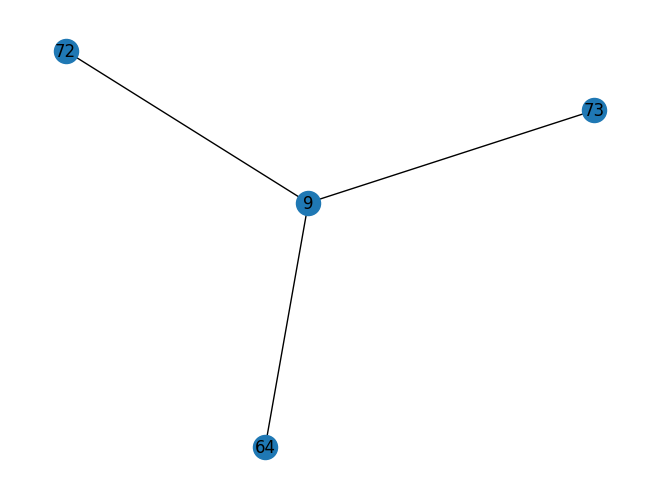

match_branches = [[64, 73]]
branches_to_avoid= [ 7 40 44]
72: No Pair so adding back old edge
72: Old neighbors = [9]
new_neighbors = [[9, 72]]
edges_to_delete (resolve crossover) = [[9, 64], [9, 73], [64, 72], [72, 73]]
edges_to_create (resolve crossover) = [[64, 73], [9, 72]]
After Resolving crossovers at end: 
edges_to_delete_new = [[9, 64], [9, 73], [64, 72], [72, 73]]
edges_to_create_new = [[64, 73], [9, 72]]
edges_to_delete (cut_limb_network) = [array([ 9, 64]), array([ 9, 73]), array([64, 72]), array([72, 73])]
edges_to_create = [[64, 73], [9, 72]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73}
Comp 1 = {72, 9, 8, 7}
Comp 2 = {74}
curr_limb_copy.deleted_edges = [array([ 9, 64]), array([ 9, 73]), array([64, 72]), 

error_branches=[ 0  1  2  3  4  5  6 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73]
valid_upstream_branches_restriction = [72, 9, 8, 7]
Error Branches = [ 0  1  2  3  4  5  6 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73]

**conn_comp_errors = [[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], [73]]
Grouping all conn comp together

**conn_comp_errors AFTER PAIRING = [[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3

point_array= [[1445596.44997291  647279.59299079  645351.49151978]
 [1444088.84585687  647505.47849369  645675.8405021 ]]
Deciding between min_cancel_distance = 1558.5559641748782, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1558.5559641748782
blue 9 node offset skeleton coordinate is [1445596.44997291  647279.59299079  645351.49151978]
 --> using closest_mesh_face method curr_points = [[1445575.          647109.6         645462.53333333]]
blue 9 node offset skeleton coordinate is [1444088.84585687  647505.47849369  645675.8405021 ]
 --> using closest_mesh_face method curr_points = [[1444114.  647626.  645757.]]
point_array= [[1447079.22988205  648103.12038639  645696.62393324]
 [1446835.82127399  648919.95785264  646168.36160816]
 [1445844.2106438   648900.48609962  646101.1643533 ]]
Deciding between min_cancel_distance = 974.1702267479463, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 64 node offset skeleton coordinat

  0%|          | 0/5 [00:00<?, ?it/s]

  Edge: [40 39]: curr_angle = 69.78
  Edge: [39 56]: curr_angle = 142.6
  Edge: [56 50]: curr_angle = 54.73
  Edge: [50 48]: curr_angle = 16.47
  Edge: [48 46]: curr_angle = 37.53
Total time for doubling_back = 0.17569422721862793
There were 1 edges that passed doubling back threshold of 110
Winning edge [39 56] had a doubling back of 142.59825538791517
Skipping endnode 44 because skeletal distance was 1410.6368569885076 and threshold was 2500
skip_nodes = [44]
inside resolve_crossover_at_end at end: 
current edges_to_delete = [array([39, 56])] 
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1410745.7239172   644747.74542943  730320.07832555]
coordinate_branches = [39, 56, 60, 61]
39 = red
56 = aqua
60 = purple
61 = green
edges_to_avoid= [array([39, 56])]
Skipping edge: [39, 56]

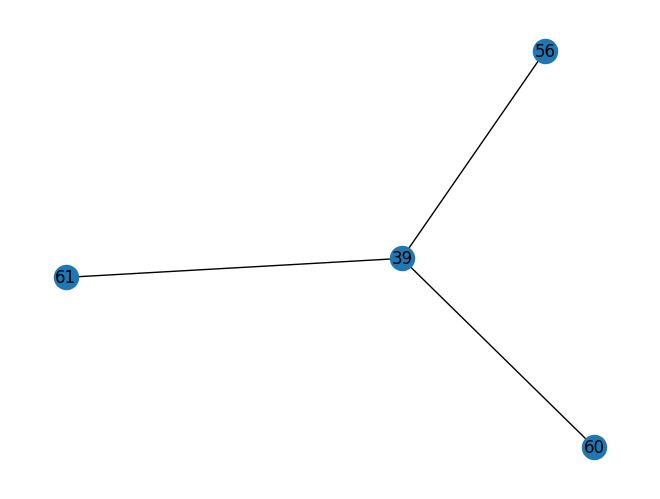

match_branches = [[39, 60], [56, 61]]
branches_to_avoid= [ 7 40 44]
new_neighbors = []
edges_to_delete (resolve crossover) = [[39, 56], [39, 61], [56, 60], [60, 61]]
edges_to_create (resolve crossover) = [[39, 60], [56, 61]]
After Resolving crossovers at end: 
edges_to_delete_new = [[39, 56], [39, 61], [56, 60], [60, 61]]
edges_to_create_new = [[39, 60], [56, 61]]
edges_to_delete (cut_limb_network) = [array([39, 56]), array([39, 61]), array([56, 60]), array([60, 61])]
edges_to_create = [[39, 60], [56, 61]]
Number of connected components = 4
Comp 0 = {0, 4, 5, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 54, 58, 60, 62, 63, 64, 69, 73}
Comp 1 = {1, 2, 3, 13, 24, 36, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 59, 61, 65, 66, 67, 68, 70, 71}
Comp 2 = {8, 9, 72, 7}
Comp 3 = {74}
curr_limb_copy.deleted_edges = [array([ 9, 64]), array([ 9, 73]), array([64, 72]), array([72, 73]), array([39, 56]), array(

point_array= [[1410071.66533565  644891.04454611  729737.54957979]
 [1409508.44321301  644807.68368381  728919.43981013]
 [1409070.4218075   644744.57200227  728026.65266158]]
Deciding between min_cancel_distance = 996.4510668529086, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 39 node offset skeleton coordinate is [1410071.66533565  644891.04454611  729737.54957979]
 --> using closest_mesh_face method curr_points = [[1409953.          645017.16666667  729775.46666667]]
red 39 node offset skeleton coordinate is [1409508.44321301  644807.68368381  728919.43981013]
 --> using closest_mesh_face method curr_points = [[1409476.66666667  644862.5         728902.33333333]]
red 39 node offset skeleton coordinate is [1409070.4218075   644744.57200227  728026.65266158]
 --> using closest_mesh_face method curr_points = [[1408898.   644706.1  727894.4]]

downstream_errors = []
For Pair 1: coordinate [[1410745.7239172   644747.74542943  730320.07832555]]
point

point_array= [[1409666.29524246  644835.64074577  729171.46700814]
 [1408918.51069164  644713.19741424  727657.98372827]]
Deciding between min_cancel_distance = 1692.573703657305, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1692.573703657305
blue 39 node offset skeleton coordinate is [1409666.29524246  644835.64074577  729171.46700814]
 --> using closest_mesh_face method curr_points = [[1409611.66666667  644865.03333333  729135.9       ]]
blue 39 node offset skeleton coordinate is [1408918.51069164  644713.19741424  727657.98372827]
 --> using closest_mesh_face method curr_points = [[1408950.66666667  644787.5         727574.86666667]]
point_array= [[1410756.45428533  644668.17801575  729501.75773346]
 [1410394.54174852  644934.1356589   728613.12932156]
 [1409997.5408649   645372.05245358  727811.53430965]]
Deciding between min_cancel_distance = 995.67796334676, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 56 node off

  0%|          | 0/4 [00:00<?, ?it/s]

  Edge: [9 5]: curr_angle = 36.11
  Edge: [5 4]: curr_angle = 149.5
  Edge: [ 4 11]: curr_angle = 44.38
  Edge: [11 10]: curr_angle = 11.69
Total time for doubling_back = 0.21018528938293457
There were 1 edges that passed doubling back threshold of 110
Winning edge [5 4] had a doubling back of 149.50343626318676
skip_nodes = []
inside resolve_crossover_at_end at end: 
current edges_to_delete = [array([5, 4])] 
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1324550.  675465.  661108.]
coordinate_branches = [3, 4, 5]
3 = red
4 = aqua
5 = purple
edges_to_avoid= [array([5, 4])]
Angle between 3 and 4 = 59.6 
width_diff = 246.00609397268028, width_diff_perc = 0.5091925900090718

Angle between 3 and 5 = 45.27 
width_diff = 68.93566156317405, width_diff_perc = 0.12486864568845588

Skipp

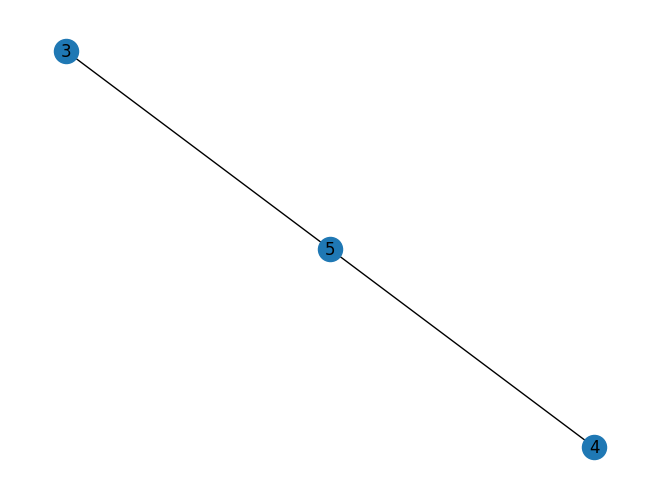

match_branches = [[3, 5]]
branches_to_avoid= [ 9 10]
new_neighbors = []
edges_to_delete (resolve crossover) = [[3, 4], [4, 5]]
edges_to_create (resolve crossover) = [[3, 5]]
After Resolving crossovers at end: 
edges_to_delete_new = [[3, 4], [4, 5]]
edges_to_create_new = [[3, 5]]
edges_to_delete (cut_limb_network) = [array([3, 4]), array([4, 5])]
edges_to_create = [[3, 5]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 5, 6, 7, 8, 9}
Comp 1 = {10, 2, 11, 4}
Comp 2 = {12}
curr_limb_copy.deleted_edges = [array([3, 4]), array([4, 5])]
curr_limb_copy.created_edges = [[3, 5]]
After get best cut: cut_edges = [array([3, 4]), array([4, 5])], added_edges = [[3, 5]]
edge_diff = [[3 4]
 [4 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


**** Computing red blue splits*

point_array= [[1325406.61449539  675325.03130277  659668.03844656]
 [1326054.32145826  675057.50405958  658229.00248527]]
Deciding between min_cancel_distance = 1600.5997730456186, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1600.5997730456186
blue 5 node offset skeleton coordinate is [1325406.61449539  675325.03130277  659668.03844656]
 --> using closest_mesh_face method curr_points = [[1325257.          675580.1         659582.46666667]]
blue 5 node offset skeleton coordinate is [1326054.32145826  675057.50405958  658229.00248527]
 --> using closest_mesh_face method curr_points = [[1326048.66666667  675311.53333333  657883.26666667]]
point_array= [[1324601.52247536  674506.45170107  661388.23221117]
 [1324595.39751453  673588.06489039  661184.07672424]
 [1324530.50325628  672801.89752778  660572.93865239]]
Deciding between min_cancel_distance = 940.8248041024273, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 4 node of

In [13]:
(split_results,
red_blue_split_results) = pru.multi_soma_split_suggestions(
    neuron_obj,
    plot_intermediates=plot_intermediates,
    plot_suggestions=plot_suggestions,
    plot_cut_coordinates = plot_cut_coordinates,
    only_multi_soma_paths=only_multi_soma_paths,
    default_cut_edge = "last",
    verbose = verbose,
    output_red_blue_suggestions = True,
    split_red_blue_by_common_upstream = True,
    apply_valid_upstream_branches_restriction = True,
    debug_red_blue = False,
)

In [14]:
from neurd import soma_splitting_utils as ssu
ssu.plot_red_blue_split_suggestions_per_limb(
    neuron_obj,
    red_blue_split_results,
)



-------- Suggestions for Limb 0------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…



-------- Suggestions for Limb 5------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…